![NYC market.png](<attachment:NYC market.png>)
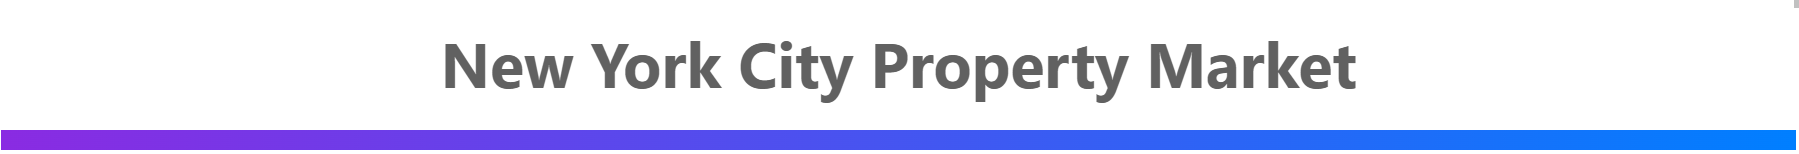

**Nama :** Difa Fisabilillah

**Kode Peserta :** PYTN-KS18-017

# **Import Library**

In [2]:
!pip install researchpy

In [3]:
import pandas  as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt # import matplotlib
import scipy.stats as stats # import scipy
import seaborn as sns # import seaborn
import math
import researchpy as rp
pd.set_option('display.max.columns',500) # Unuk menampilkan semua kolom

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd './drive/MyDrive/Hacktiv8/NYC Property Sales/'

/content/drive/MyDrive/Hacktiv8/NYC Property Sales


# **ABOUT DATA**

In [6]:
# Load data
NYC=pd.read_csv('./nyc-rolling-sales.csv')
NYC.head() # preview data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
# cek shape data
NYC.shape

(84548, 22)

Dataset ini memiliki 84.548 baris dan 22 feature kolom

In [8]:
# Cek info data
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Pada tahap ini function .info() digunakan untuk melihat apakah ada data null pada tiap feature dan untuk mengecek tipe data apa yang dimiliki feature tersebut. Pada kolom SALE PRICE & SALE DATE type data yang di miliki tidak sesuai. Maka dari itu untuk kolom SALE PRICE perlu diubah menjadi type numerik dan Kolom SALE DATE diubah menjadi tipe datetime

In [9]:
NYC['SALE PRICE'] = pd.to_numeric(NYC['SALE PRICE'], errors='coerce') # mengubah tipe data kolom SALE PRICE menjadi numeric

In [10]:
NYC['SALE DATE'] = pd.to_datetime(NYC['SALE DATE']) # mengubah tipe data kolom SALE DATE menjadi datetime

In [11]:
# cek kembali nan/null value
NYC.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Setelah dilakukan convert tipe data ke numerik, kolom Sale price memiliki 14561 null value, maka dari itu perlu dilakukan drop nan value

In [12]:
# drop nan value
NYC.dropna(inplace=True)

## Add and Drop Columns

In [13]:
months =['Jan','Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # membuat list untuk kumpulan bulan
NYC['YEAR SOLD'] = NYC['SALE DATE'].dt.year # membuat kolom baru untuk tahun
NYC['MONTH SOLD'] = NYC['SALE DATE'].dt.month # membuat kolom bary untuk bulan

In [14]:
# kolom ini digunakan untuk mengabungkan bulan dan tahun kapan building tersebut terjual
NYC['MONTH AND YEAR OF SALES '] = [months[month-1]+' '+ str(year) for month, year in zip(NYC['MONTH SOLD'], NYC['YEAR SOLD'])]

In [15]:
NYC.drop(['Unnamed: 0','BLOCK','LOT','EASE-MENT'], axis=1, inplace=True) # menghapus kolom 'Unnamed: 0','BLOCK','LOT','EASE-MENT' karena tidak digunakan

# **Explore Data**

In [16]:
NYC.head(10) # menampilkan tabel data terbaru dari NYC

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR SOLD,MONTH SOLD,MONTH AND YEAR OF SALES
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19,2017,7,Jul 2017
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23,2016,9,Sep 2016
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17,2016,11,Nov 2016
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23,2016,9,Sep 2016
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07,2016,11,Nov 2016
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,D1,530-532 EAST 5TH STREET,,10009,10,0,10,3717,12350,2009,2,D1,10350000.0,2016-10-17,2016,10,Oct 2016
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,1.0,2016-09-06,2016,9,Sep 2016
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,-,-,1920,2,C6,499000.0,2017-03-10,2017,3,Mar 2017
14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,-,-,1920,2,C6,10.0,2017-04-28,2017,4,Apr 2017
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"327 EAST 3RD STREET, 5A",,10009,0,0,0,-,-,1920,2,C6,529500.0,2017-06-09,2017,6,Jun 2017


In [17]:
NYC['BOROUGH'].unique() # untuk melihat category yang ada di kolom BOROUGH

array([1, 2, 3, 4, 5])

Data pada kolom Borough memiliki 5 kategori wilayah yang dinyatakan dengan angka 1-5. Dimana :

    1 : Manhattan
    2 : Bronx
    3 : Brooklyn
    4 : Queens
    5 : Staten Island

In [18]:
# cek jumlah total unit tiap wilayah
borough_count=NYC.groupby('BOROUGH')['TOTAL UNITS'].sum().reset_index()
borough_count

,BOROUGH,TOTAL UNITS
0,1,28153
1,2,25403
2,3,53400
3,4,31400
4,5,8071


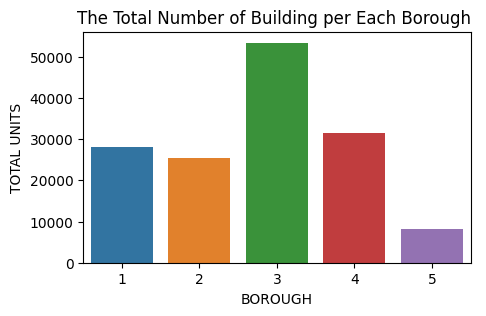

In [19]:
plt.figure(figsize=(5,3))
sns.barplot(data=borough_count, x='BOROUGH',y='TOTAL UNITS').set_title('The Total Number of Building per Each Borough ')
plt.show()

Pada data borough_count, ditemukan bahwa wilayah Queens memiliki total unit property yang paling banyak dibanding dengan wilayah lain dengan angka 53400.

## **MEAN**

In [20]:
NYC['YEAR SOLD'].unique() # cek pada tahun berapa saja property terjual

array([2017, 2016])

Diketahui bahwa property terjual selama tahun 2016 - 2017

In [21]:
mean_all_price_for_2Y=np.mean(NYC['SALE PRICE']) # mencari rata-rata dari sale price selama 2 tahun
mean_all_price_for_2Y

1276456.4977638705

Rata-rata penjualan selama 2 tahun adalah sebesar 1276456.5 dolar

## **Median**

In [22]:
# mencari nilai tengah dari kolom sale price
NYC['SALE PRICE'].median()

530000.0

Nilai tengah atau median pada data sale price adalah 530000 dolar

## **Modus**

In [23]:
# mencari nilai yang paling sering muncul dari kolom borough
regions=NYC['BOROUGH'].mode().values[0]
regions

3

Wilayah yan paling sering tersebut pada kolom Borough adalah wilayah Queens

In [24]:
# pada bulan berapa sering terjadi penjualan property pada tahun 2016
month_2016=NYC[NYC['SALE DATE'].dt.year == 2016]['SALE DATE'].dt.month.mode().values[0]
month_2016

12

Pada tahun 2016 terjadi banyak penjualan pada bulan Desember

In [25]:
# pada bulan berapa sering terjadi penjualan property pada tahun 2017
month_2017 = NYC[NYC['SALE DATE'].dt.year == 2017]['SALE DATE'].dt.month.mode().values[0]
month_2017

6

Sedangkan pada tahun 2017 penjualan paling banyak terjadi pada bulan Juni

## **Range**

In [26]:
max_of_price=NYC['SALE PRICE'].max()
min_of_price=NYC['SALE PRICE'].min()
ranges_of_price = max_of_price - min_of_price
print(f'Range of Sales Price adalah {ranges_of_price}')

Range of Sales Price adalah 2210000000.0


Diketahui bahwa range adalah 2210000000

In [27]:
max_of_price

2210000000.0

In [28]:
min_of_price

0.0

Tetapi, setelah cek nilai max_of_price dan min_of_price terdapat keanehan data, dimana nilai paling kecil dari harga gedung / apartment adalah 0. Maka dapat di simpulkan bahwa dalam dataset ini memiliki outliers.


Untuk mengukur penyebaran atau keragaman data dalam sebuah dataset, perlu di temukan nilai IQR-nya, untuk mengetahui lower dan upper limit persebaran data.

In [29]:
# describe data
NYC['SALE PRICE'].describe()

count    6.998700e+04
mean     1.276456e+06
std      1.140526e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [30]:
Q1 = NYC['SALE PRICE'].quantile(0.25) # mencari nilai Q1 (Quartil 1)
Q3 = NYC['SALE PRICE'].quantile(0.75) # mencari nilai Q3 (Quartil 3)
IQR = Q3 - Q1 # mencari nilai IQR
print(f'Q1 : {Q1}')
print(f'Q3 : {Q3}')
print(f'IQR : {IQR}')

Q1 : 225000.0
Q3 : 950000.0
IQR : 725000.0


In [31]:
lower_limit =  Q1 -(IQR*1.5) # nilai lower limit dari outlier
upper_limit = Q3 + (IQR*1.5) # nilai upper limit dari outlier
print(f'lower limit : {lower_limit}')
print(f'upper limit : {upper_limit}')

lower limit : -862500.0
upper limit : 2037500.0


Masih terdapat ketidaksesuaian dalam data, dimana nilai lower limit adalah min, sehingga angka 0.0 (min_of_price) akan dianggap bukan sebagai outliers. Sedangkan tidak mungkin gedung/apartment/properties dijual dengan harga 0.0 dolar.


Maka dari itu perlu dilakukan pembersihan data kembali dengan permisalan minimum harga penjualan rumah adalah 40.000 usd.

In [32]:
# mengambil data dengan Sale price >= 40000
NYC_cleaned = NYC[NYC['SALE PRICE'] >= 40000]
NYC_cleaned.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR SOLD,MONTH SOLD,MONTH AND YEAR OF SALES
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19,2017,7,Jul 2017
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23,2016,9,Sep 2016
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17,2016,11,Nov 2016
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23,2016,9,Sep 2016
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07,2016,11,Nov 2016


In [33]:
# memeriksa shape data NYC_cleaned
NYC_cleaned.shape

(57953, 21)

Setelah pembersihan data dengan batas minimum 40.000 usd, dilakukan pembersihan kembali dari nilai upper limit (2037500.0)

In [34]:
# Cleanning data dari angka yang melebihi upper limit
NYC_cleaned=NYC_cleaned[NYC_cleaned['SALE PRICE'] <=2037500.0]
NYC_cleaned.shape

(51301, 21)

Sekarang, data NYC berkurang yang sebelumnya adalah 84548 baris menjadi 51301.

In [35]:
# Cek kembali range dari Sale price
max_of_price=NYC_cleaned['SALE PRICE'].max() # maksimum harga penjualan
min_of_price=NYC_cleaned['SALE PRICE'].min() # minimum harga penjualan
ranges_of_price = max_of_price - min_of_price # range harga penjualan
print(f'Min of Price : {min_of_price}')
print(f'Max of Price : {max_of_price}')
print(f'Range of Sales Price : {ranges_of_price}')

Min of Price : 40000.0
Max of Price : 2037500.0
Range of Sales Price : 1997500.0


Maka dapat ditarik kesimpulan bahwa nilai penjualan paling kecil adalah 40000 usd dan maksimal penjualan adalah 2037500 usd, dengan ranges atau selisih sebesar 1997500 usd

## **Variance**

In [36]:
# mencari variance dari Sale price
var=NYC_cleaned['SALE PRICE'].var()
var

175387131504.23172

variance dari data kolom Sale price adalah 175387131504.23172. Dapat pula dilakukan dengan cara dibawah ini untuk mengetahui selisih titik data dengan rata-rata.

In [37]:
# mencari rata-rata
mean_NYC_cleaned = sum(NYC_cleaned['SALE PRICE']) / len(NYC_cleaned)

# selisih titik data dan rata-rata
differences = [(x - mean_NYC_cleaned) ** 2 for x in NYC_cleaned['SALE PRICE']]

# rata-rata variance
variance = sum(differences) / len(NYC_cleaned)
print(f'variance : {variance}')

variance : 175383712718.4085


Pada variable different ini ditemukan sebaran selisih titik data dan rata-rata Sale price

In [38]:
# selisih antara titik data dengan rata-rata
differences

[30080153313.290207,
 20430788458.355606,
 62218472296.078064,
 29390408076.901054,
 49477911604.824486,
 26385554513.14986,
 103965173424.28218,
 103965173424.28218,
 72058052041.77502,
 18888739058.28543,
 529348924319.97626,
 37466902435.88043,
 100765810333.3093,
 17573132145.74963,
 38981096149.96005,
 49477911604.824486,
 49477911604.824486,
 18923769054.776745,
 138708804334.01105,
 138708804334.01105,
 8730343857.724043,
 684861662500.5186,
 25739809276.760704,
 68872816332.60756,
 29734280695.09563,
 26385554513.14986,
 38981096149.96005,
 13591523818.117165,
 61224727059.68891,
 33283006877.0414,
 69398688950.80214,
 66273453241.63468,
 63724090150.6618,
 56376000877.74314,
 9493834330.50235,
 4547655784.665039,
 16018367854.917091,
 16272495236.722515,
 381236239949.00977,
 68872816332.60756,
 644108477955.383,
 113863262697.20084,
 33283006877.0414,
 6016126146.451366,
 11569947600.614056,
 85518994878.44487,
 58775363968.71603,
 29768777956.91509,
 529348924319.97626,
 464

Dan nilai variancenya masih sama dengan yang awal

## **Standard Deviation**

In [39]:
# mencari standard deviasi
std_ = np.std(NYC_cleaned['SALE PRICE'])
std_

418788.38656105153

Standard deviasi yang dihasilkan dari dara sale price adalah 418788.39

## **Probability Distribution**

### Normal Distribution

<Axes: ylabel='Density'>

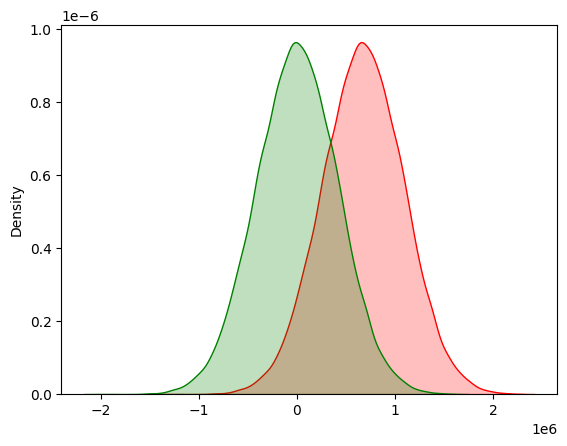

In [40]:
sale_price_data = NYC_cleaned['SALE PRICE']
X = stats.norm(mean_NYC_cleaned,std_ ).rvs(size=57953, random_state=0)
sns.kdeplot(X, color='red',fill=True)

# kurva normal standard
X_standard = (X-X.mean())
sns.kdeplot(X_standard, color='green', fill=True )

Pada kurva berwarna merah adalah visualisasi data sale price, dan pada grafik warna hijau adalah kurva normal standard dari data sale price

In [41]:
# 68% populasi
min_68p = mean_NYC_cleaned - std_
max_68p = mean_NYC_cleaned + std_
print(f'Nilai min dari 68% populasi : {min_68p}')
print(f'Nilai max dari 68% populasi : {max_68p}')

Nilai min dari 68% populasi : 253647.922536237
Nilai max dari 68% populasi : 1091224.6956583401


Dari output yang dihasilkan, menunjukkan bahwa 68% dari harga jual properti berada diantara 253647.9 usd dan 1091224.696 usd.

### Confidence Intervals

In [42]:
pop_size = len(sale_price_data) # menghitung banyaknya populasi
np.random.seed(0)  # Menetapkan seed untuk random_state
random_NYC_sales_price = np.random.choice(a=sale_price_data, size=pop_size) # mengambil nilai ajak dari data sale_price_data (kolom sale price)
z_critical = stats.norm.ppf(q=0.975) # menggunakan tingkat kepercayaan 95%
margin_of_error = z_critical * std_ / math.sqrt(pop_size) # mencari margin error
confidence_interval = (mean_NYC_cleaned - margin_of_error,
                       mean_NYC_cleaned + margin_of_error)
print(f'z-critical value: {z_critical}')

print(f'Confidence_interval : {confidence_interval}')

z-critical value: 1.959963984540054
Confidence_interval : (668812.3790545902, 676060.2391399868)


Berarti dengan tingkat kepercayaan 95%, rata-rata harga jual populasi diperkirakan berada dalam rentang tersebut. Dengan kata lain, Anda memiliki keyakinan 95% bahwa rata-rata harga jual di populasi seharusnya berada antara 668,812.38 usd dan 676,060.24 usd

In [43]:
# Definisikan z_critical
z_critical = stats.norm.ppf(q=0.025)  # tingkat kepercayaan 95% (0.025 di kedua ekor distribusi normal standar).

intervals = []
pop_means = []

# Iterasi melalui data sale price
for _ in NYC_cleaned['SALE PRICE']:
    pop = np.random.choice(a=sale_price_data, size=pop_size) # mengambil random sample
    pop_mean = pop.mean() # menghitung rata-rata dari sampel
    pop_means.append(pop_mean) # menambahkan rata-rata ke pop_means

    margin_of_error = z_critical * (std_ / math.sqrt(pop_size)) # seberapa jauh rata-rata sampel dapat berbeda dari rata-rata populasi dengan tingkat kepercayaan 95%
    confidence_interval = (pop_mean - margin_of_error, pop_mean + margin_of_error) # menghitung interval kepercayaan
    intervals.append(confidence_interval) # menambahkan confidence_interval ke intervals

In [67]:
# rata rata sale_price_data
sale_price_data.mean()

672436.3090972885

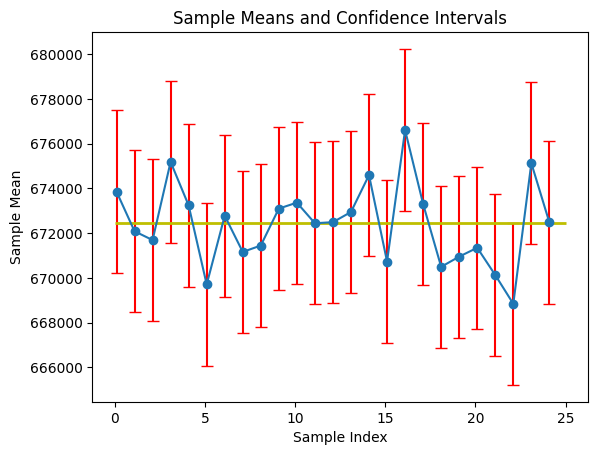

In [68]:
yerr_data = [(top - bot) / 2 for top, bot in intervals[:25]] # menghitung data error untuk 25 sampel pertama dari daftar intervals
# plot errorbar
plt.errorbar(x=np.arange(0.1, 25, 1),
             y=pop_means[:25],
             yerr=yerr_data,
             fmt='o-',  # Format marker
             ecolor='red',  # Warna garis kesalahan
             capsize=4  # Ukuran kap
            )

# menambahkan garis horizontal unutk nilai Confident interval
plt.hlines(xmin=0, xmax=25,
           y=672436.30, # rata-rata sale_price_data
           linewidth=2.0,
           color="y");

plt.xlabel('Sample Index')
plt.ylabel('Sample Mean')
plt.title('Sample Means and Confidence Intervals')
plt.show()


# **Hipotesis Testing**

In [46]:
# membuat data berisikan data kolom borough dan sale price
NYC_Borough=NYC_cleaned[['BOROUGH', 'SALE PRICE']]
NYC_Borough.head()

,BOROUGH,SALE PRICE
13,1,499000.0
15,1,529500.0
16,1,423000.0
17,1,501000.0
18,1,450000.0


In [47]:
# Membuat dictionary untuk replace kode dengan label
borough_mapping = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}

# map data untuk mengubah nilai kolom 'BOROUGH' menjadi label
NYC_Borough['BOROUGH'] = NYC_Borough['BOROUGH'].map(borough_mapping)


<ipython-input-47-65280675f856>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_Borough['BOROUGH'] = NYC_Borough['BOROUGH'].map(borough_mapping)


In [49]:
Bronx = NYC_Borough[NYC_Borough['BOROUGH']=='Bronx'].reset_index() # memilih data wilayah bronx
Brooklyn = NYC_Borough[NYC_Borough['BOROUGH']=='Brooklyn'].reset_index() # memilih data wilayah Brooklyn
Manhattan = NYC_Borough[NYC_Borough['BOROUGH']=='Manhattan'].reset_index() # memilih data wilayah Manhattan
Queens = NYC_Borough[NYC_Borough['BOROUGH']=='Queens'].reset_index() # memilih data wilayah Queens
Staten_Island = NYC_Borough[NYC_Borough['BOROUGH']=='Staten Island'].reset_index() # memilih data wilayah Staten_Island

In [50]:
# Cek shape tiap data wilayah
print(f'Bronx : {Bronx.shape}')
print(f'Brooklyn : {Brooklyn.shape}')
print(f'Manhattan : {Manhattan.shape}')
print(f'Queens : {Queens.shape}')
print(f'Staten_Island : {Staten_Island.shape}')

Bronx : (4675, 3)
Brooklyn : (13455, 3)
Manhattan : (9896, 3)
Queens : (17508, 3)
Staten_Island : (5767, 3)


In [51]:
#  mengambil sampel masing-masing 4000 data dari tiap wilayah
Borough_in_NYC = pd.concat([Bronx.iloc[0:4000], Brooklyn.iloc[0:4000], Manhattan.iloc[0:4000], Queens.iloc[0:4000], Staten_Island.iloc[0:4000]]).drop(columns=['index'])
Borough_in_NYC.head()

,BOROUGH,SALE PRICE
0,Bronx,140000.0
1,Bronx,420000.0
2,Bronx,127000.0
3,Bronx,273796.0
4,Bronx,231244.0


In [52]:
# membuat setiap borough menjadi kolom dengan 'SALE PRICE' sebagai nilai
pivot_df = Borough_in_NYC.pivot_table(index=Borough_in_NYC.index, columns='BOROUGH', values='SALE PRICE')

# Reset indeks agar kolom borough
pivot_df.reset_index(drop=True, inplace=True)
pivot_df.head()


BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,140000.0,800000.0,499000.0,792000.0,437500.0
1,420000.0,1200000.0,529500.0,275500.0,579000.0
2,127000.0,1090000.0,423000.0,970000.0,370000.0
3,273796.0,1060000.0,501000.0,1400000.0,439000.0
4,231244.0,950000.0,450000.0,425000.0,300000.0


## Normality Check

Mengambil data dari 2 wilayah untuk dibandingkan dan diambil hipotesisnya

In [53]:
# mengambil wilayah Manhattan dan Brooklyn
Manhattan_Brooklyn = pivot_df[['Manhattan', 'Brooklyn']]

In [54]:
# menghitung residu atau selisih sale price antara wilayah Manhattan dan Brooklyn
Manhattan_Brooklyn['Residu'] = Manhattan_Brooklyn['Manhattan'] - Manhattan_Brooklyn['Brooklyn']
Manhattan_Brooklyn.head()

<ipython-input-54-f941bd675ba1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Manhattan_Brooklyn['Residu'] = Manhattan_Brooklyn['Manhattan'] - Manhattan_Brooklyn['Brooklyn']


BOROUGH,Manhattan,Brooklyn,Residu
0,499000.0,800000.0,-301000.0
1,529500.0,1200000.0,-670500.0
2,423000.0,1090000.0,-667000.0
3,501000.0,1060000.0,-559000.0
4,450000.0,950000.0,-500000.0


<Axes: xlabel='Residu', ylabel='Density'>

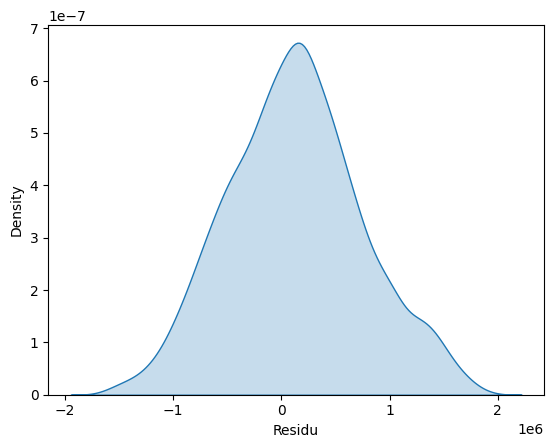

In [55]:
# plot kde pada data Manhattan_Brooklyn['Residu']
sns.kdeplot(Manhattan_Brooklyn['Residu'], fill=True)

Plot KDE digunakan untuk cek apakah data Manhattan_Brooklyn['Residu'] berdistribusi normal atau tidak. Dan output yang dihasilkan adalah kurva normal, yang berarti Manhattan_Brooklyn['Residu'] berdistribusi normal. Setelah data terbukti normal dilakukan uji statistik. Uji statistik akan dikaukan menggunakan Shapiro-Wilk statistic.

In [56]:
stats.shapiro(Manhattan_Brooklyn.Residu)

ShapiroResult(statistic=0.9965524077415466, pvalue=5.731875418746313e-08)

Statistik uji (Shapiro-Wilk statistic) mengasilkan 2 output. Dalam kasus ini, nilai statistik uji cukup tinggi (0.9976), menunjukkan bahwa data cenderung mendekati distribusi normal.Nilai yang kedua adalah nilai p-value. Nilai p-value yang dihasilkan sangat rendah (5.715990482713096e-06 atau sekitar 0.0000057), yang menunjukkan bahwa terdapat bukti yang kuat untuk menolak hipotesis bahwa data berasal dari distribusi normal. Artinya, data ini tidak mengikuti distribusi normal.

Dengan demikian, berdasarkan hasil uji Shapiro-Wilk, data Manhattan_Brooklyn.Residu tidak terdistribusi normal, karena nilai p sangat rendah.

## Homogenity Check

{'whiskers': [<matplotlib.lines.Line2D at 0x7b44bc821360>,
 'caps': [<matplotlib.lines.Line2D at 0x7b44bc822d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b44bc822680>,
 'medians': [<matplotlib.lines.Line2D at 0x7b44bc823280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b44bc8237c0>,
 'means': [<matplotlib.lines.Line2D at 0x7b44bc823520>,
  <matplotlib.lines.Line2D at 0x7b44bc85ca60>]}

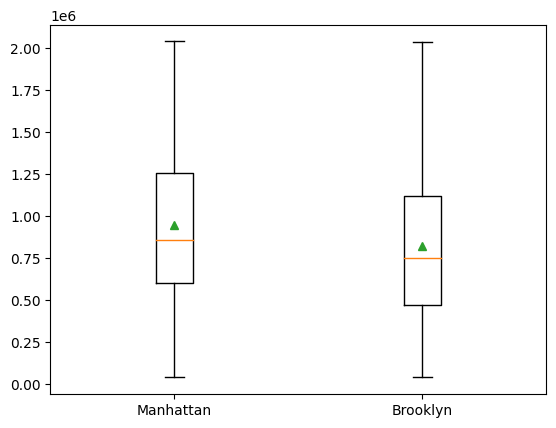

In [57]:
plt.boxplot([Manhattan_Brooklyn.Manhattan, Manhattan_Brooklyn.Brooklyn], labels=['Manhattan', 'Brooklyn'], showmeans=True)

Pada langkah ini dilakukan cek apakah persebaran antara wilayah Manhattan dan Brooklyn dapat dikatakan sama-sama homogen atau berbeda secara signifikan.

## Uji Levene

In [58]:
stats.levene(Manhattan_Brooklyn.Manhattan, Manhattan_Brooklyn.Brooklyn)

LeveneResult(statistic=2.283919343698098, pvalue=0.1307606699208207)

Fokus pada pvaluenya, jika lebih besar dari 0.05, maka akan diterima h0 bahwa kedua wilayah sama saja , tetapi kalau pvaluenya kecil dibawah 0.05 maka ada sesuatu yang membuat mereka berbeda.

* h0 : variance homogen
* h1 : ada sesuatu yang membuat variance tidak homogen





## T-Test

In [59]:
# melakukan t-test
rp.ttest(Manhattan_Brooklyn.Manhattan, Manhattan_Brooklyn.Brooklyn)

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(    Variable       N         Mean             SD           SE      95% Conf.  \
 0  Manhattan  4000.0  945522.9030  459991.055428  7273.097192  931263.578645   
 1   Brooklyn  4000.0  819144.7840  446014.575944  7052.109648  805318.718405   
 2   combined  8000.0  882333.8435  457414.562698  5114.050280  872308.972231   
 
         Interval  
 0  959782.227355  
 1  832970.849595  
 2  892358.714769  ,
                      Independent t-test      results
 0  Difference (Manhattan - Brooklyn) =   126378.1190
 1                 Degrees of freedom =     7998.0000
 2                                  t =       12.4748
 3              Two side test p value =        0.0000
 4             Difference < 0 p value =        1.0000
 5             Difference > 0 p value =        0.0000
 6                          Cohen's d =        0.2789
 7                          Hedge's g =        0.2789
 8                     Glass's delta1 =        0.2747
 9                   Point-Biserial r =        0.1382

Karena  Two side test p value = 0.0000 maka h0 tidak diterima karena lebih kecil dari 0.05.